In [ ]:
Importing necessary libraries and data

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    StackingClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
)

from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

# To tune a model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from utils import (
    col_out,
    model_summary,
    adj_r2_score,
    model_performance_regression,
    confusion_matrix_helper,
    model_performance_classification_sklearn,
)


import sklearn.metrics as metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config

set_config(display="diagram")

HotelRes_data = (pd.read_csv("hotelReservation.csv").rename(
                    columns=lambda col: col.replace("'", "")
                                            .replace('tag_','')
                                            .replace('_p','P')
                                            .replace('_c','C')
                                            .replace(' ','')
                                            .replace('-','')
                ).reset_index(drop=True))

In [2]:
HotelRes_data.tail()

,Unnamed:0,Booking_ID,no_of_adults,no_ofChildren,no_of_weekend_nights,no_of_week_nights,type_of_mealPlan,requiredCarParking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_ofPreviousCancellations,no_ofPrevious_bookings_notCanceled,avgPricePer_room,no_of_special_requests,booking_status
36270,36270,INN36271,3.0,0,2.0,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,36271,INN36272,2.0,0,1.0,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,36272,INN36273,2.0,0,2.0,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,36273,INN36274,2.0,0,0.0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,36274,INN36275,2.0,0,1.0,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [3]:
HotelRes_data = HotelRes_data.drop(columns=["Unnamed:0"])


In [4]:
HotelRes_data.isnull().sum()

Booking_ID                              0
no_of_adults                          100
no_ofChildren                           0
no_of_weekend_nights                  199
no_of_week_nights                       0
type_of_mealPlan                        0
requiredCarParking_space                0
room_type_reserved                    145
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                   611
repeated_guest                          0
no_ofPreviousCancellations              0
no_ofPrevious_bookings_notCanceled      0
avgPricePer_room                        0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
HotelRes_data.describe()

,no_of_adults,no_ofChildren,no_of_weekend_nights,no_of_week_nights,requiredCarParking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_ofPreviousCancellations,no_ofPrevious_bookings_notCanceled,avgPricePer_room,no_of_special_requests
count,36175.000000,36275.000000,36076.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844976,0.105279,0.810871,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518701,0.402648,0.870437,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
Data Preprocessing

In [6]:
# categorical columns for the hotelReservation dataset
categorical_columns = [
    "type_of_mealPlan",
    "room_type_reserved",
    "market_segment_type",
]

# numeric columns
numeric_columns = HotelRes_data.columns.difference(
    categorical_columns + ["booking_status", "Booking_ID"]
).tolist()
numeric_columns

['arrival_date',
 'arrival_month',
 'arrival_year',
 'avgPricePer_room',
 'lead_time',
 'no_ofChildren',
 'no_ofPreviousCancellations',
 'no_ofPrevious_bookings_notCanceled',
 'no_of_adults',
 'no_of_special_requests',
 'no_of_week_nights',
 'no_of_weekend_nights',
 'repeated_guest',
 'requiredCarParking_space']

In [7]:
# column transformer (steps for data transformations, missing value imputation, transformation, scaling, and encoding)
colu_transformer = make_pipeline(
    ColumnTransformer(
        transformers=[
            (
                "imputeScale",
                Pipeline(
                    [
                        ("KNNImpute", KNNImputer(n_neighbors=3)),
                        (
                            "logTransform",
                            FunctionTransformer(
                                np.log1p, feature_names_out=col_out, validate=True
                            ),
                        ),
                        ("scaler", StandardScaler()),
                    ]
                ),
                ["no_of_adults", "no_of_weekend_nights"],
            ),
            (
                "scale",
                Pipeline(
                    [
                        (
                            "logTransform",
                            FunctionTransformer(
                                np.log1p, feature_names_out=col_out, validate=True
                            ),
                        ),
                        ("standardScale", StandardScaler()),
                    ]
                ),
                ["lead_time", "avgPricePer_room", "no_of_week_nights"],
            ),
            (
                "imputeOneHot",
                Pipeline(
                    [
                        (
                            "SimpleImpute",
                            SimpleImputer(
                                missing_values=np.NaN,
                                strategy="constant",
                                fill_value="is_missing",
                            ),
                        ),
                        ("oneHotEncode", OneHotEncoder(drop="first")),
                    ]
                ),
                categorical_columns,
            ),
        ],
        verbose_feature_names_out=False,
        remainder="passthrough",
    )
)

In [8]:
# column transformer (steps for data transformations, missing value imputation, transformation, scaling, and encoding)
# Define a column transformer
col_transformer = ColumnTransformer(
    transformers=[
        (
            "numeric",
            Pipeline(
                [
                    ("imputer", SimpleImputer(strategy="mean")),
                    ("scaler", StandardScaler()),
                ]
            ),
            numeric_columns,
        ),
        (
            "categorical",
            Pipeline(
                [
                    (
                        "imputer",
                        SimpleImputer(strategy="constant", fill_value="missing"),
                    ),
                    ("encoder", OneHotEncoder(handle_unknown="ignore")),
                ]
            ),
            categorical_columns,
        ),
    ]
)

In [9]:
# Convert target to binary
y = HotelRes_data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

# Drop the target and identifier columns to create the features dataframe
X = HotelRes_data.drop(columns=["booking_status", "Booking_ID"])
print(X.head(4))
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

   no_of_adults  no_ofChildren  no_of_weekend_nights  no_of_week_nights  \
0           2.0              0                   1.0                  2   
1           2.0              0                   2.0                  3   
2           1.0              0                   2.0                  1   
3           2.0              0                   0.0                  2   

  type_of_mealPlan  requiredCarParking_space room_type_reserved  lead_time  \
0      Meal Plan 1                         0        Room_Type 1        224   
1     Not Selected                         0        Room_Type 1          5   
2      Meal Plan 1                         0        Room_Type 1          1   
3      Meal Plan 1                         0        Room_Type 1        211   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              

In [ ]:
# Decision Tree model.

In [10]:
# using column transformer and pipeline help in avoiding data leakage.
decision_tree = Pipeline(
    steps=[
        ("col_transformer", colu_transformer),
        ("d_tree", DecisionTreeClassifier(random_state=42)),
    ]
)

decision_tree

Pipeline(steps=[('col_transformer',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('imputeScale',
                                                                   Pipeline(steps=[('KNNImpute',
                                                                                    KNNImputer(n_neighbors=3)),
                                                                                   ('logTransform',
                                                                                    FunctionTransformer(feature_names_out=<function col_out at 0x7f9433d2e820>,
                                                                                                        func=<ufunc 'log1p'>,
                                                                                                        validate=True)),
                                                                                   ('scaler',
                                                                                    StandardScaler())...
                                                                    'avgPricePer_room',
                                                                    'no_of_week_nights']),
                                                                  ('imputeOneHot',
                                                                   Pipeline(steps=[('SimpleImpute',
                                                                                    SimpleImputer(fill_value='is_missing',
                                                                                                  strategy='constant')),
                                                                                   ('oneHotEncode',
                                                                                    OneHotEncoder(drop='first'))]),
                                                                   ['type_of_mealPlan',
                                                                    'room_type_reserved',
                                                                    'market_segment_type'])],
                                                    verbose_feature_names_out=False))])),
                ('d_tree', DecisionTreeClassifier(random_state=42))])

In [11]:
# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = decision_tree.predict(X_train)
y_test_pred_dt = decision_tree.predict(X_test)

# Evaluate the performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the performance on the test data
test_accuracy = accuracy_score(y_test, y_test_pred_dt)

# Print the results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report for test data
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred_dt))

Training Accuracy: 0.99
Test Accuracy: 0.87

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7276
           1       0.79      0.81      0.80      3607

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883



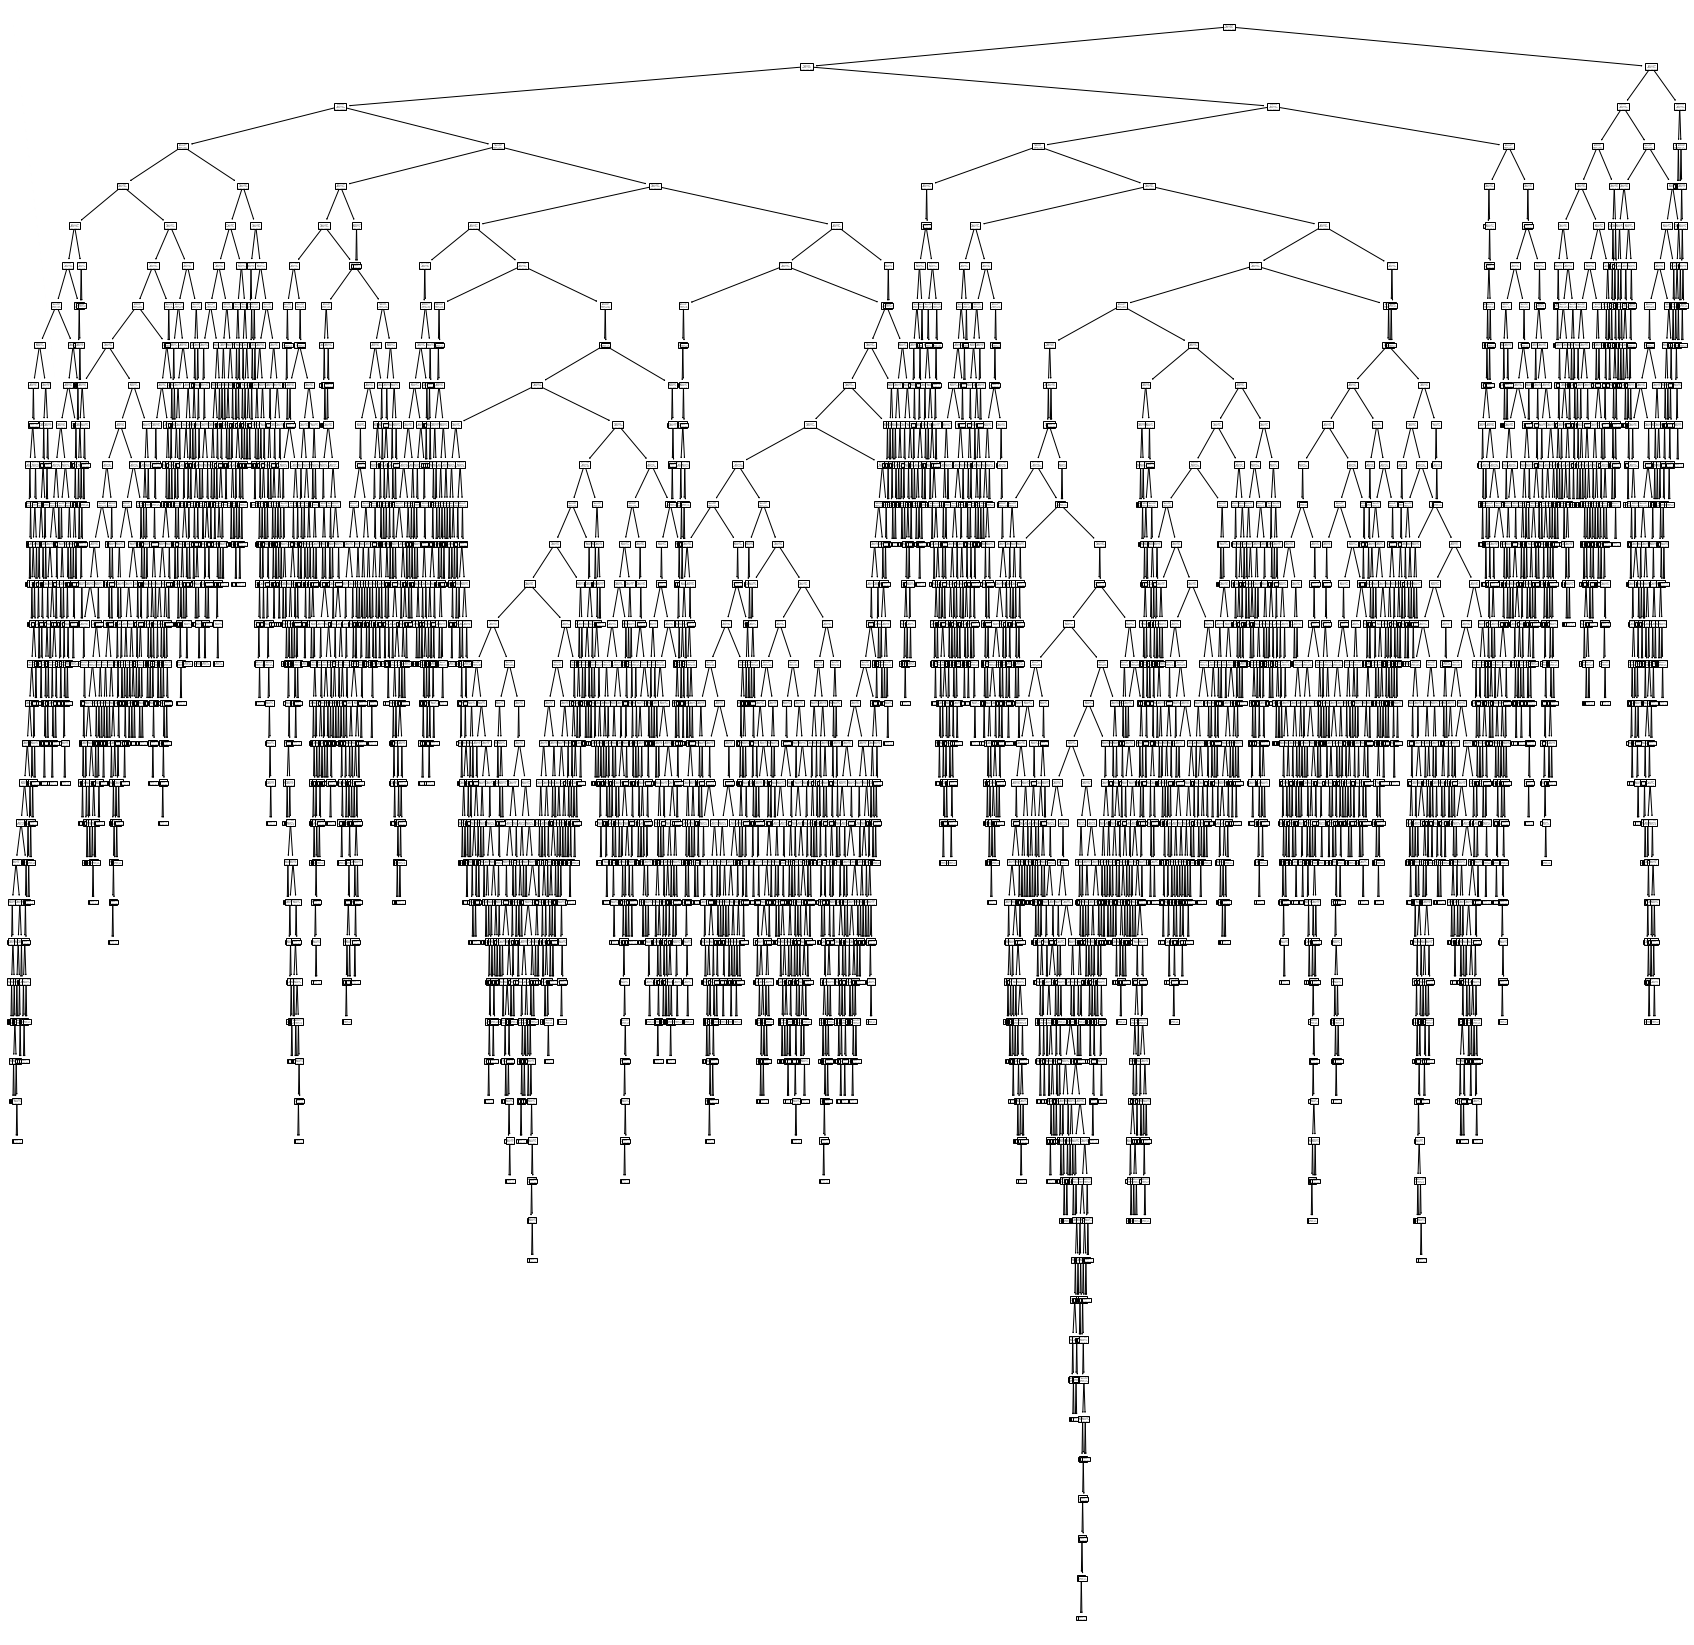

CPU times: user 1min 35s, sys: 4.57 s, total: 1min 40s
Wall time: 1min 40s


In [12]:
%%time

decision_tree.fit(X_train, y_train)
plt.figure(figsize=(30, 30))
plot_tree(decision_tree['d_tree'])
plt.show()

In [13]:
cross_val_score(decision_tree, X_train, y_train, cv=10)

array([0.85944882, 0.85787402, 0.87120914, 0.86333202, 0.86963371,
       0.86057503, 0.85269791, 0.86608901, 0.85624262, 0.85742418])

In [14]:
cross_validate(decision_tree, X_train, y_train, cv=10, scoring="f1")

{'fit_time': array([0.25247407, 0.18494701, 0.18114614, 0.18582296, 0.17623091,
        0.18098092, 0.17233825, 0.17965174, 0.1814301 , 0.17851901]),
 'score_time': array([0.01900911, 0.02513623, 0.0168221 , 0.01663995, 0.01732302,
        0.01663303, 0.02263188, 0.0179491 , 0.01820183, 0.01682997]),
 'test_score': array([0.78165138, 0.78626406, 0.80500894, 0.79083785, 0.80262373,
        0.78674699, 0.77711561, 0.79217604, 0.78104379, 0.78033981])}

In [15]:
cv_predict = cross_val_predict(decision_tree, X_train, y_train, cv=10)
cv_predict

array([1, 1, 0, ..., 0, 1, 1])

In [16]:
# Calculate F1 score for the cross-validated predictions
f1_cv_score = f1_score(y_train, cv_predict)

f1_cv_score

0.7884037050402983

In [ ]:
Observation on the model:
1.cross_val_score:The accuracy scores from the 10-fold cross-validation varies from 
    approximately 85% to 87%, which is consistent with the test accuracy we saw earlier, 
    suggesting that the model has similar performance across different subsets of the 
    training data
2.The cross_validate with F1: This provides a dictionary with the time taken to fit and 
    score the model, as well as the test scores (F1 scores) for each fold. 
    The F1 scores range from approximately 0.77 to 0.80. The F1 score calculated 
    from the predictions made by cross_val_predict is about 0.788. This is a measure 
    of the model's accuracy in terms of precision and recall and is more informative 
    than accuracy alone, especially if the class distribution is imbalanced.
    
The cross-validation results suggest that the Decision Tree model has consistent 
performance across different folds. As F1 score is reasonably high, although there is still 
evidence of overfitting given the perfect training accuracy. 
To improve the model, it may be necessary to adjust its complexity, perhaps by pruning, 
or to employ other strategies such as ensemble methods to enhance generalization,model is 
overfit as train accuracy is 99% and test accuracy is 87%.

In [17]:
# Hyperparameters for the Decision tree

In [18]:
# Grid of parameters to choose from
parameters = {
    # The maximum depth of the tree. If None, then nodes
    # are expanded until all leaves are pure or until all leaves
    # contain less than min_samples_split samples.
    "max_depth": np.arange(3, 9),
    # The minimum number of samples required to split an internal node
    "min_samples_split": [5, 10, 30],
    # The minimum number of samples required to be at a leaf node
    "min_samples_leaf": [15, 20],
    # Grow a tree with max_leaf_nodes in best-first fashion
    "max_leaf_nodes": [10, 25, 50],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# using column transformer and pipeline help in avoiding data leakage.
decision_tree_pipeline = Pipeline(
    steps=[
        ("col_transformer", colu_transformer),
        (
            "d_tree",
            GridSearchCV(
                DecisionTreeClassifier(),
                parameters,
                scoring=acc_scorer,
                cv=5,
                n_jobs=-1,
                verbose=2,
            ),
        ),
    ]
)

decision_tree_pipeline = decision_tree_pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [19]:
decision_tree_pipeline

Pipeline(steps=[('col_transformer',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('imputeScale',
                                                                   Pipeline(steps=[('KNNImpute',
                                                                                    KNNImputer(n_neighbors=3)),
                                                                                   ('logTransform',
                                                                                    FunctionTransformer(feature_names_out=<function col_out at 0x7f9433d2e820>,
                                                                                                        func=<ufunc 'log1p'>,
                                                                                                        validate=True)),
                                                                                   ('scaler',
                                                                                    StandardScaler())...
                                                                   ['type_of_mealPlan',
                                                                    'room_type_reserved',
                                                                    'market_segment_type'])],
                                                    verbose_feature_names_out=False))])),
                ('d_tree',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              n_jobs=-1,
                              param_grid={'max_depth': array([3, 4, 5, 6, 7, 8]),
                                          'max_leaf_nodes': [10, 25, 50],
                                          'min_samples_leaf': [15, 20],
                                          'min_samples_split': [5, 10, 30]},
                              scoring=make_scorer(f1_score), verbose=2))])

In [20]:
decision_tree_pipeline[-1].best_params_

{'max_depth': 8,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 15,
 'min_samples_split': 5}

In [21]:
decision_tree_pipeline[-1].best_estimator_

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=50, min_samples_leaf=15,
                       min_samples_split=5)